### Q1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

In matrix multiplication of $n \times k$ matrix and $k \times m$ matrix requires: 
multiplications: $n \times k \times m$ because the resultant matrix will have $n \times m$ elements and to calculate each element of resultant matrix we need to perform $k$ number of multiplications. 
additions: $n \times m \times (k-1)$ because resultant matrix has $n \times m$ elements and to calculate each element we need to perform $(k-1)$ additions.

### Q2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [113]:
import random
from datetime import datetime
import numpy as np


n=150
k=200
m=220



a=[[random.randint(0,5) for i in range(k)] for j in range(n)]
b=[[random.randint(0,5) for i in range(m)] for j in range(k)]
c=[[0 for i in range(m)] for j in range(n)]
        
def using_list():
  start=datetime.now()
  for i in range(len(a)):
      for j in range(len(b[0])):
          for l in range(len(b)):
              c[i][j]+=a[i][l]*b[l][j]
  return (datetime.now()-start).microseconds
       
list_time=[using_list() for i in range(0,10)]
list_time=np.array(list_time)
print("mean : ",np.mean(list_time)," standard deviation: ",np.std(list_time))


def using_numpy():
  start=datetime.now()
  x=np.array(a)
  y=np.array(b)
  z=np.matmul(x,y)
  return (datetime.now()-start).microseconds

numpy_time=[using_numpy() for i in range(0,10)]
numpy_time=np.array(numpy_time)
print("mean : ",np.mean(numpy_time)," standard deviation: ",np.std(numpy_time))



mean :  540090.5  standard deviation:  104424.21820176582
mean :  11186.9  standard deviation:  381.6719664843097


numpy is faster then lists.
numpy is faster then lists because : 
numpy is stores its elements in contiguous memory locations whereas lists store its elements in non-contiguous memory locations which makes allows numpy to 
perform operations faster as data elements are not scatterred in the memory which makes access of different data elements faster. Numpy is also based on
faster languages like c,c++ and fortran which makes it more faster.


### Q3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [114]:
import random 
import math
from datetime import datetime
import numpy as np

n=1000
a=[random.randint(1,10) for i in range(n)]
median=math.ceil(n/2)

def first_method():
  start=datetime.now()
  for i in range(0,median):
      for j in range(0,n-i):
          if j!=n-i-1 and a[j]>a[j+1]:
              a[j],a[j+1]=a[j+1],a[j]
  if n%2==0 :
      answer=(a[median]+a[median-1])/2
  else:
      answer=a[median-1]
  ans=(datetime.now()-start).microseconds
  return ans
    

first_time=[first_method() for i in range(100)]
first_time=np.array(first_time)
print("mean : ",np.mean(first_time)," standard deviation: ",np.std(first_time))
  

def second_method():
  start=datetime.now()
  b=a.sort()
  if n%2==0 :
      answer=(a[median]+a[median-1])/2
  else:
      answer=a[median-1]
  return (datetime.now()-start).microseconds
    
second_time=[second_method() for i in range(100)]
first_time=np.array(second_time)
print("mean : ",np.mean(second_time)," standard deviation: ",np.std(second_time))


def third_method():
  start=datetime.now()
  b=np.array(a)
  answer=np.median(b)
  return (datetime.now()-start).microseconds

third_time=[third_method() for i in range(100)]
first_time=np.array(third_time)
print("mean : ",np.mean(third_time)," standard deviation: ",np.std(third_time))

        
 

mean :  91971.17  standard deviation:  26577.92711633283
mean :  9.1  standard deviation:  1.2999999999999998
mean :  163.14  standard deviation:  112.42731162844728


The time complexity for finding median using described method is $O(n^2)$






### Q4) What is the gradient of the following function with respect to x and y? x^2y+y^3sin(x)



\begin{aligned}\nabla (x^2y + y^3\sin(x))(x,y) &= \ (y(2x + y^2\cos(x)),x^2 + 3y^2\sin(x))\end{aligned}





### Q 5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [115]:
import jax.numpy as jnp
from jax import grad
import random

def f(x, y):
  return x ** 2*y + y**3*jnp.sin(x)

def fx(x,y):
  return 2*x*y+y**3*jnp.cos(x)

def fy(x,y):
  return x**2+3*y**2*jnp.sin(x)

dxy = grad(f, argnums=(0, 1))


for i in range(0,10):
  x = random.random()
  y = random.random()
  print("Using our method : ",dxy(x,y)[0],dxy(x,y)[1],"\nUsing Jax: ",fx(x,y),fy(x,y))


Using our method :  0.16781716 0.14140421 
Using Jax:  0.16781716 0.14140421
Using our method :  0.49806064 0.7345389 
Using Jax:  0.49806064 0.7345389
Using our method :  1.3672812 1.6284 
Using Jax:  1.3672812 1.6284001
Using our method :  1.0318296 1.0054264 
Using Jax:  1.0318296 1.0054263
Using our method :  0.4084793 0.17499211 
Using Jax:  0.40847933 0.17499211
Using our method :  1.9282467 2.5183768 
Using Jax:  1.9282467 2.5183768
Using our method :  0.80541134 0.38296765 
Using Jax:  0.80541146 0.38296768
Using our method :  1.9262257 2.6513472 
Using Jax:  1.9262257 2.6513476
Using our method :  0.026489347 0.003492845 
Using Jax:  0.026489347 0.0034928448
Using our method :  1.7096274 1.4685943 
Using Jax:  1.7096272 1.4685943


### Q 6) Use sympy to confirm that you obtain the same gradient analytically.

In [116]:
from sympy import diff, sin, Symbol
from sympy.abc import x,y 

f=x*x*y+y*y*y*sin(x)

diff(f,x)

2*x*y + y**3*cos(x)

In [117]:
diff(f,y)

x**2 + 3*y**2*sin(x)

### Q7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:




In [118]:
import json

student_data={}
years=[2022,2023,2024,2025]
branches=["Branch CSE",'Branch ME','Branch EE','Branch CE']
students=['manish','hitesh','navneet','aditi','anupam','anant']
subjects=['ML','DL','CNS','POE']

        
for i in range(len(years)):
    student_data[years[i]]={}
    for j in range(len(branches)):
        student_data[years[i]][branches[j]]={}
        for k in range(len(students)):
            student_data[years[i]][branches[j]][k]={}
            for l in range(3):
                if l==0:
                    student_data[years[i]][branches[j]][k]["Roll_No"]=k+1
                if l==1:
                    student_data[years[i]][branches[j]][k]["Name"]=random.choice(students)
                if l==2:
                    student_data[years[i]][branches[j]][k]["Marks"]={}
                    for m in range(len(subjects)):
                        student_data[years[i]][branches[j]][k]["Marks"][subjects[m]]=random.randint(0,100)
                

pretty=json.dumps(student_data,indent=5)
print(pretty)
                

                
                


{
     "2022": {
          "Branch CSE": {
               "0": {
                    "Roll_No": 1,
                    "Name": "aditi",
                    "Marks": {
                         "ML": 17,
                         "DL": 24,
                         "CNS": 27,
                         "POE": 32
                    }
               },
               "1": {
                    "Roll_No": 2,
                    "Name": "anant",
                    "Marks": {
                         "ML": 77,
                         "DL": 23,
                         "CNS": 61,
                         "POE": 67
                    }
               },
               "2": {
                    "Roll_No": 3,
                    "Name": "anant",
                    "Marks": {
                         "ML": 93,
                         "DL": 96,
                         "CNS": 37,
                         "POE": 20
                    }
               },
               "3": {
                    

### Q 8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [119]:
import json
names=['manish','hitesh','navneet','aditi','anupam','anant']


class subjects:
    def __init__(self):
        self.ML=random.randint(1,100)
        self.DL=random.randint(1,100)
        self.CNS=random.randint(1,100)
        self.POE=random.randint(1,100)

    def __repr__(self):
        return ""
        
    def __str__(self):
        return str(self.__dict__)
        
class student:
    def __init__(self):
        self.name=random.choice(names)
        self.roll=random.randint(1,5)
        self.marks=subjects()
        
    def __str__(self):
        return str(self.__dict__)
    
class branch:
    def __init__(self):
        self.student1=student()
        self.student2=student()
        self.student3=student()
        self.student4=student()
        self.student5=student()
        
    def __str__(self):
        return str(self.__dict__)
        
class data:
    def __init__(self,year):
        self.year=random.randint(2021,2025)
        self.CSE=branch()
        self.ME=branch()
        self.EE=branch()
        self.CE=branch()
        
    def __str__(self):
        return str(self.__dict__)
    
years=[data(i) for i in range(2021,2025)]

print("example below showing how is data stored in the above code ")

print(years[0].year)
print("\t CSE")
print("\t\t",years[0].CSE.student1)
print("\t\t\t",years[0].CSE.student1.marks)





example below showing how is data stored in the above code 
2025
	 CSE
		 {'name': 'manish', 'roll': 1, 'marks': }
			 {'ML': 78, 'DL': 73, 'CNS': 46, 'POE': 71}


### Q 9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

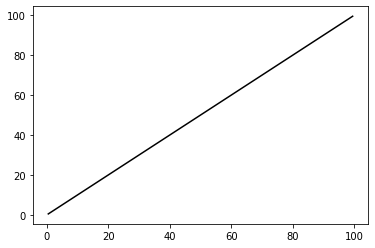

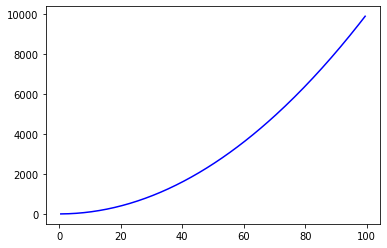

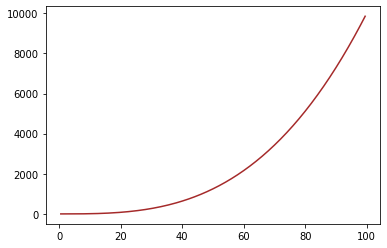

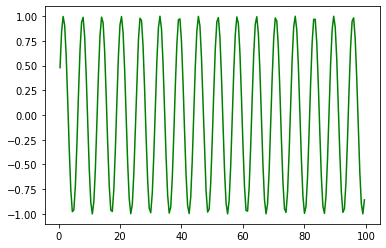

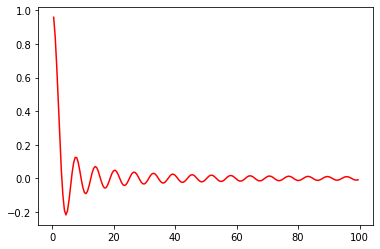

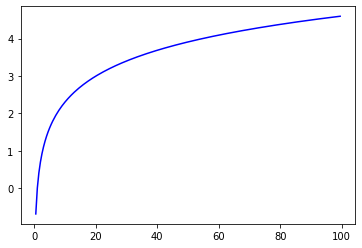

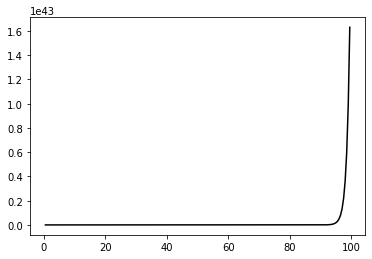

In [120]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.5,100.0,0.5)
plt.plot(x,x,'black')
plt.show()

plt.plot(x,x**2,'-b')
plt.show()

plt.plot(x,x**3/100,'brown')
plt.show()

plt.plot(x,np.sin(x),'green')
plt.show()

plt.plot(x,np.sin(x)/x,'red')
plt.show()

plt.plot(x,np.log(x),'blue')
plt.show()

plt.plot(x,np.exp(x),'black')
plt.show()


### Q 10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.



In [121]:
import numpy as np
import pandas as pd
import random
a=[[random.randint(1,2) for i in range(0,5)] for j in range(0,20)]
a=np.array(a)
df=pd.DataFrame(a,columns=("a","b","c","d","e"))
print(df)
print("\n")
print("column with highest standard deviation : ",df.std().idxmax())
print("row with lowest mean : ",df.mean(axis=1).idxmin())





    a  b  c  d  e
0   1  1  1  1  2
1   1  1  1  2  2
2   2  1  1  1  2
3   1  1  1  1  2
4   2  2  1  1  1
5   1  1  1  1  2
6   2  1  2  2  2
7   1  2  1  1  1
8   1  1  1  1  2
9   1  1  2  1  1
10  1  2  1  2  2
11  2  2  2  2  2
12  1  1  1  2  1
13  2  2  2  1  2
14  2  1  1  2  1
15  1  1  2  2  1
16  2  1  1  2  2
17  2  1  1  2  1
18  1  2  2  1  1
19  1  2  1  1  1


column with highest standard deviation :  d
row with lowest mean :  0


### Q 11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.


In [122]:
import numpy as np
import pandas as pd
import random
a=[[random.randint(1,2) for i in range(0,5)] for j in range(0,20)]
a=np.array(a)
df=pd.DataFrame(a,columns=("a","b","c","d","e"))
df["f"]=df.sum(axis='columns')
g=["LT8" if df.iloc[i]["f"]<8 else "GT8" for i in range(0,20)]
df["g"]=g
print(df)
print("\nnumber of rows in the dataframe where the value in the column “g” is “LT8” are : ",(len(df[df['g']=="LT8"])))

print("standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” : ",df[df['g']=="LT8"]['f'].std())
print("standard deviation of the column “f” for the rows where the value in the column “g” is “GT8” : ",df[df['g']=="GT8"]['f'].std())





    a  b  c  d  e   f    g
0   2  2  2  2  1   9  GT8
1   2  2  2  1  1   8  GT8
2   1  1  1  2  1   6  LT8
3   2  2  1  1  1   7  LT8
4   2  2  1  2  2   9  GT8
5   1  2  1  1  1   6  LT8
6   2  1  1  2  1   7  LT8
7   1  2  2  1  1   7  LT8
8   2  2  2  2  2  10  GT8
9   2  2  1  2  2   9  GT8
10  1  1  2  2  1   7  LT8
11  2  2  2  2  2  10  GT8
12  1  2  2  1  1   7  LT8
13  1  2  2  2  2   9  GT8
14  1  2  2  2  2   9  GT8
15  1  1  1  1  2   6  LT8
16  1  2  2  1  1   7  LT8
17  1  2  1  2  2   8  GT8
18  1  1  2  2  2   8  GT8
19  2  2  2  1  1   8  GT8

number of rows in the dataframe where the value in the column “g” is “LT8” are :  9
standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” :  0.5
standard deviation of the column “f” for the rows where the value in the column “g” is “GT8” :  0.7507571935295483


### Q 12) Write a small piece of code to explain broadcasting in numpy.


In [123]:
import numpy as np
a=np.array([[2,1],[3,4]])
b=np.array([6,7])
c=a+b
print(c)


[[ 8  8]
 [ 9 11]]


### Q 13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [124]:
import numpy as np

a=np.array([[-2,4,6,1,0,-4,5,12],[2,2,1,3,4,4,5,5]])
a=a.flatten()
print(a)
def argmin(a):
    MIN=0
    for i in range(len(a)):
        if a[i]<a[MIN]:
            MIN=i
    return MIN
    
print("Index of minimum element using argmin function : ",argmin(a))
print("Index of minimum element using np.argmin : ",np.argmin(a))

[-2  4  6  1  0 -4  5 12  2  2  1  3  4  4  5  5]
Index of minimum element using argmin function :  5
Index of minimum element using np.argmin :  5
